<a href="https://colab.research.google.com/github/maa929/4105/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [173]:
file1 = 'https://raw.githubusercontent.com/maa929/4105/main/diabetes.csv'
file2 = 'https://raw.githubusercontent.com/maa929/4105/main/cancer.csv'
ds1 = pd.DataFrame(pd.read_csv(file1))
ds2 = pd.DataFrame(pd.read_csv(file2))

*Problem* 1

In [174]:
X = ds1.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = ds1.iloc[:, 8].values

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [176]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [178]:
Y_pred = classifier.predict(X_test)

In [179]:
conf_matx = confusion_matrix(Y_test, Y_pred)

In [180]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1_Score",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1_Score 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

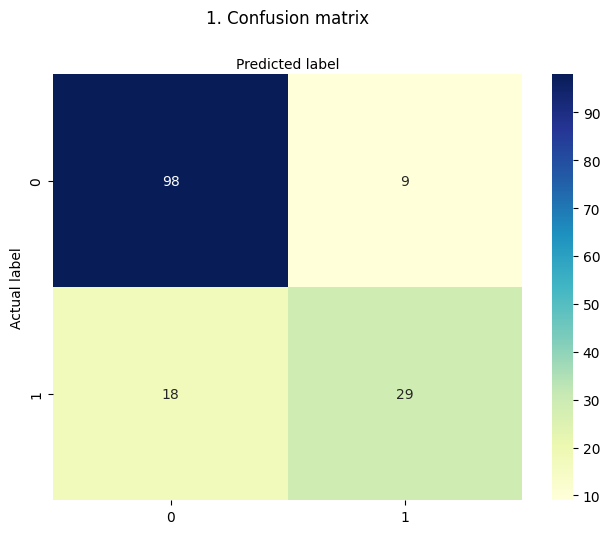

In [181]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('1. Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 2

In [182]:
varlist =  ['diagnosis']

def binary_map(x):
    return x.map({'M': 1, 'B': 0})

ds2[varlist] = ds2[varlist].apply(binary_map)

X = ds2.iloc[:, 2:32].values
Y = ds2.iloc[:, 1].values

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [184]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [185]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [186]:
Y_pred = classifier.predict(X_test)

In [187]:
conf_matx = confusion_matrix(Y_test, Y_pred)

In [188]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1_Score",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1_Score 0.9574468085106385


Text(0.5, 427.9555555555555, 'Predicted label')

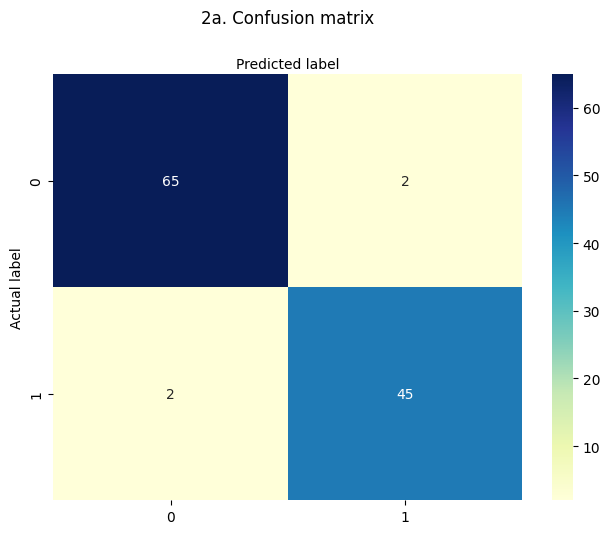

In [189]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('2a. Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [191]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [192]:
C = [10, 1, .1, .001]
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_std, Y_train))
    print('Test accuracy:', clf.score(X_test_std, Y_test))
    print('')

C: 10
Training accuracy: 0.9164835164835164
Test accuracy: 0.8947368421052632

C: 1
Training accuracy: 0.4901098901098901
Test accuracy: 0.5

C: 0.1
Training accuracy: 0.2021978021978022
Test accuracy: 0.18421052631578946

C: 0.001
Training accuracy: 0.13406593406593406
Test accuracy: 0.12280701754385964



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 427.9555555555555, 'Predicted label')

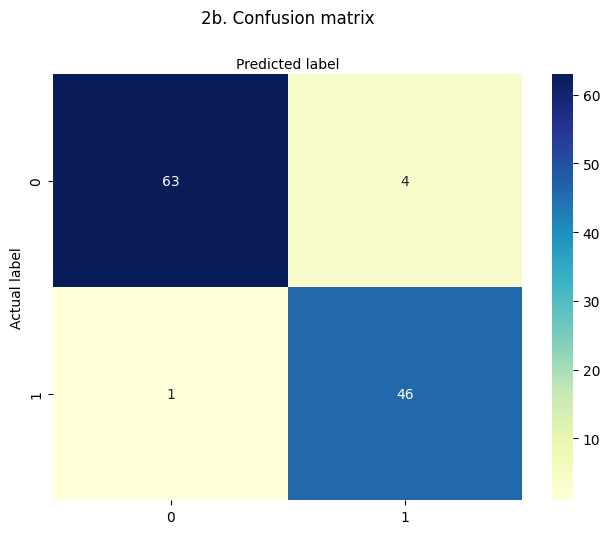

In [194]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('2b. Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 3

In [195]:
model = GaussianNB()
model.fit(X,Y)
expected = Y
predicted = model.predict(X)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       357
           1       0.95      0.89      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[347  10]
 [ 23 189]]


Problem 4

In [196]:
X_train_4 = scaler.fit_transform(X_train)
X_test_4 = scaler.transform(X_test)
pca = PCA(n_components = 2)
pca_train = pca.fit_transform(X_train_4)
pca_test = pca.transform(X_test_4)
pDf_train = pd.DataFrame(data = pca_train, columns = ['principal component 1', 'principal component 2'])
pDf_train.head()

,principal component 1,principal component 2
0,-3.039161,1.106670
1,-2.282314,0.400452
2,-1.084095,-1.995444
3,-2.561100,0.179338
4,-2.848305,-1.017616


In [197]:
model = LogisticRegression(solver='liblinear')
kfold = KFold(n_splits = 11) # K = 11 yielded the greatest accuracy
results = cross_val_score(model, pca_train, Y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.473% (3.016%)


In [198]:
classifier = LogisticRegression(random_state=0)
classifier.fit(pca_train, Y_train)
Y_pred = classifier.predict(pca_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("F1_Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 0.9361702127659575
F1_Score: 0.9072164948453608


Problem 5

In [199]:
X_train_5 = scaler.fit_transform(X_train)
X_test_5 = scaler.transform(X_test)
pca_train = pca.fit_transform(X_train_5)
pca_test = pca.fit_transform(X_test_5)
pDf_train = pd.DataFrame(data = pca_train, columns = ['principal component 1', 'principal component 2'])
pDf_train.head()

,principal component 1,principal component 2
0,-3.039161,1.106670
1,-2.282314,0.400452
2,-1.084095,-1.995444
3,-2.561100,0.179338
4,-2.848305,-1.017616


In [200]:
model = GaussianNB()
kfold = KFold(n_splits = 3) # K = 3 yielded the greatest accuracy
results = cross_val_score(model, pca_train, Y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 91.873% (1.532%)


In [201]:
classifier = GaussianNB()
classifier.fit(pca_train, Y_train)
Y_pred = classifier.predict(pca_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("F1_Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.8947368421052632
Precision: 0.8571428571428571
Recall: 0.8936170212765957
F1_Score: 0.875
